## Vector-valued function with Random Fourier Features

### Imports

In [183]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

### Values

In [184]:

dimension = 2
sigma = 10
sigma2 = 2*sigma**2

# Random Fourier features
m = 20 # number of samples
w = np.array([randn(m) / sigma, randn(m) / sigma]) # w is the same size as the dimensions times the number of samples
b = np.random.rand(m)*2*np.pi # b is the same size as number of samples

n = 100 # number of points

x1 = randn(n)/2
x2 =  randn(n)/2
x_vector = np.array([x1, x2])
# x_vector = np.block([x1,x2])

y1 = np.cos(x1) + randn(n) * 1e-1
y2 = np.sin(x2) + randn(n) * 1e-1


#y1 = 1+np.sin(x1/10) + x1**2
#y2 = 0.5 * x2**2 + np.exp(x2)

y = np.block([y1, y2])
print(y)

#print(y1, y2)
lam = 0.000001 # Regularisaton parameter

[ 0.61097663  1.04243075  0.98080313  0.85220868  1.12233084  1.02990752
  0.96054054  0.90166891  0.83883356  0.77212277  0.96735977  0.77812366
  1.15984494  0.85183721  0.72420408  0.76287044  0.87883561  1.0011825
  0.82656542  1.05065518  1.14823328  0.2879144   0.93987607  0.93940376
  0.79540478  0.92051167  1.17770389  0.96098853  1.19207838  0.81158667
  0.97542167  1.17141296  0.17658715  1.04210366  0.89306605  0.91655818
  0.68402955  1.01433294  0.40424869  1.04574857  0.95275595  0.90001322
  0.94577434  0.66851465  0.79660846  0.88547312  1.19043969  0.8895922
  1.2176439   1.068786    1.09387095  0.52330298  1.09261174  0.86243655
  1.10377496  1.05248978  0.96755718  0.94276616  0.99989618  0.97664233
  0.97740064  0.93488197  0.84642923  0.72422183  1.13000983  0.87689464
  0.66486287  0.54268127  0.62350418  0.52114678  0.64850113  0.94511899
  1.12437722  0.89752711  0.57538436  1.00441603  0.94054091  1.11172892
  0.74252782  1.0058161   0.85624427  0.83808922  0.9

### Gaussian Kernel

In [185]:
def k_gauss(x, z):
    k = np.exp(-((np.linalg.norm(x-z))**2)/(2*sigma**2))
    return k

def k_matrix(x, z, dim):
    k = k_gauss(x, z)
    k_matrix = k *np.eye(dim)
    return k_matrix

def K_gauss(x, n, dim):
    K = np.zeros((dim*n, dim*n))
    for i in range(0, n):
        for j in range(0, n):
            k = k_gauss(x[:,i], x[:,j])
            K[i*dim][j*dim] = k
            K[i*dim+1][j*dim+1] = k
    return K

K = K_gauss(x_vector, n, dimension)
print(K)

[[1.         0.         0.99712126 ... 0.         0.99565129 0.        ]
 [0.         1.         0.         ... 0.98553403 0.         0.99565129]
 [0.99712126 0.         1.         ... 0.         0.99983241 0.        ]
 ...
 [0.         0.98553403 0.         ... 1.         0.         0.99701137]
 [0.99565129 0.         0.99983241 ... 0.         1.         0.        ]
 [0.         0.99565129 0.         ... 0.99701137 0.         1.        ]]


#### Alpha

In [186]:
# Returns a vector with length dim * n
def alpha(x, y, lam, n, dim):
    K = K_gauss(x, n, dim)
    alpha_vector = np.linalg.inv((K + n*lam*np.eye(dim*n))) @ y
    alpha_reshape = [alpha_vector[::2], alpha_vector[1::2]]
    return np.array(alpha_reshape)

alpha_ = alpha(x_vector, y, lam, n, dimension)

#### Estimated function

In [187]:
def estiamted_function(alpha, x, n, dim):
    function = np.zeros((2, n))
    for i in range(n):
        sum1 = np.zeros((2))
        x_i = x[:, i]
        for j in range(n):
            k = k_gauss(x_i, x[:, j])
            kernel = k*np.eye(dim)
            sum1 = np.add(sum1, kernel@alpha[:, j])
        function[:, i] = sum1 # Blir ca halvparten så liten :((
    return function

func = estiamted_function(alpha_, x, n, dimension)
func[0]
r = np.sort(x1)
func[0].shape


(100,)

#### Plot

C:\Users\vilde\AppData\Local\Temp\ipykernel_20088\546873767.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\vilde\AppData\Local\Temp\ipykernel_20088\546873767.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


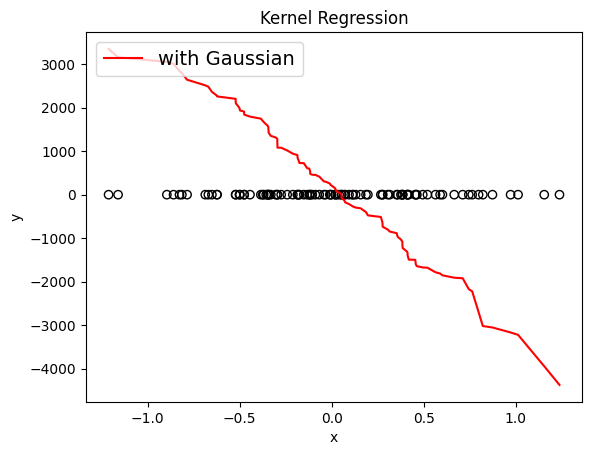

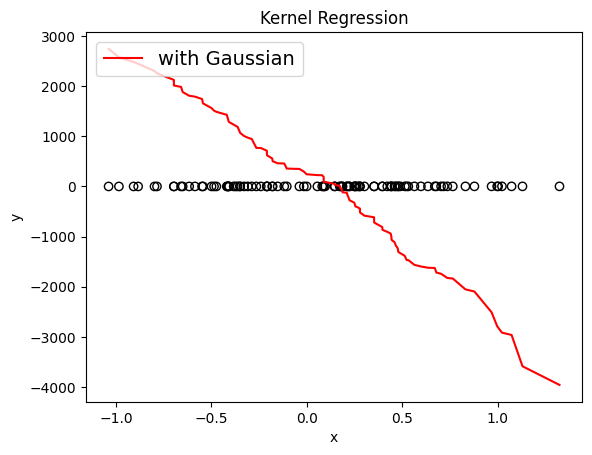

In [188]:
# Plot for x1 and y1
f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x1), func[0], c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x2), func[1], c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()

### With Random Fourier Features

#### Psi

In [189]:
def psi(x, w, b):
    return np.sqrt(2) * np.cos(w.T@x + b)

def psi_vector(x, w, b, m):
    psi_vector = np.zeros(m)
    for i in range(m):
        psi_vector[i] = psi(x, w[:, i], b[i])
    return np.array(psi_vector)

def capital_psi(x, w,b, m, dim):
    psi = psi_vector(x,w,b,m)
    return np.kron(psi, np.eye(dim))

capital_psi(x_vector[:, 1], w, b, m, dimension)

array([[-0.47949574, -0.        , -1.23978792, -0.        , -0.8187296 ,
        -0.        , -1.38586165, -0.        ,  1.40214521,  0.        ,
        -1.41400019, -0.        , -1.22237225, -0.        , -0.74172041,
        -0.        , -0.34958145, -0.        ,  0.54014538,  0.        ,
         0.21135062,  0.        ,  0.90564164,  0.        , -1.40426841,
        -0.        ,  0.9920521 ,  0.        ,  1.118633  ,  0.        ,
         0.46328048,  0.        ,  0.50335393,  0.        ,  1.41380986,
         0.        , -1.20849784, -0.        , -1.25112419, -0.        ],
       [-0.        , -0.47949574, -0.        , -1.23978792, -0.        ,
        -0.8187296 , -0.        , -1.38586165,  0.        ,  1.40214521,
        -0.        , -1.41400019, -0.        , -1.22237225, -0.        ,
        -0.74172041, -0.        , -0.34958145,  0.        ,  0.54014538,
         0.        ,  0.21135062,  0.        ,  0.90564164, -0.        ,
        -1.40426841,  0.        ,  0.9920521 ,  0.

#### Phi

In [190]:
def phi(x, w, b, n, m, dim):
    phi = np.zeros((dim*n, dim*m))
    for i in range(0, n):
        psi = capital_psi(x[:,i], w, b, m, dim)
        phi[dim*i] = psi[0]
        phi[dim*i+1] = psi[1]
    return phi

phi_ = phi(x_vector, w, b, n, m, dimension)
phi_

array([[-0.4044064 , -0.        , -1.23398998, ..., -0.        ,
        -1.22159354, -0.        ],
       [-0.        , -0.4044064 , -0.        , ..., -1.1963252 ,
        -0.        , -1.22159354],
       [-0.47949574, -0.        , -1.23978792, ..., -0.        ,
        -1.25112419, -0.        ],
       ...,
       [-0.        , -0.57308541, -0.        , ..., -1.21784983,
        -0.        , -1.29598479],
       [-0.49749743, -0.        , -1.24034385, ..., -0.        ,
        -1.26328217, -0.        ],
       [-0.        , -0.49749743, -0.        , ..., -1.20873462,
        -0.        , -1.26328217]])

#### Alpha

In [191]:
def alpha_approx(phi, y, n, dim, m, lam):
    alpha = np.linalg.inv(phi.T @ phi + lam*n*np.eye(dim*m)) @ (phi.T@y)
    return alpha

alpha_approximation = alpha_approx(phi_, y, n, dimension, m, lam)
alpha_approximation.shape

(40,)

#### Function Approximation

In [192]:
def function_approximation(alpha, x, n, dim):
    f = np.zeros((dim, n))
    for i in range(n):
        f[:, i] = capital_psi(x[:, i], w, b, m, dim) @ alpha
    return f

# Evt: Gir samme resultat
def func_2(alpha, phi):
    func = phi @ alpha
    return np.array([func[::2], func[1::2]])

function_approximation(alpha_approximation, x_vector, n, dimension)
#print(func_2(alpha_approximation, phi_))

array([[0.69464399, 0.50527221, 0.48108302, 0.31664649, 0.4343785 ,
        0.46126308, 0.60837465, 0.45157614, 0.46392883, 0.49782848,
        0.41934445, 0.46507594, 0.45835575, 0.53831412, 0.67460229,
        0.51371901, 0.41653464, 0.45873989, 0.62101543, 0.45870172,
        0.42374155, 0.81381982, 0.53627048, 0.44063661, 0.5345433 ,
        0.49067045, 0.47364298, 0.46290574, 0.46261357, 0.63115441,
        0.40539164, 0.43921329, 0.52714057, 0.44901385, 0.46304746,
        0.45861767, 0.48753292, 0.39502814, 0.46003365, 0.40393695,
        0.55684489, 0.4998103 , 0.45715293, 0.62680944, 0.47114088,
        0.49832492, 0.44405346, 0.45488413, 0.46685511, 0.46905054,
        0.55415725, 0.41320276, 0.47141398, 0.54250213, 0.42543287,
        0.47518259, 0.43323056, 0.46297522, 0.35453292, 0.45975228,
        0.44773819, 0.41593875, 0.46819663, 0.44354804, 0.49307568,
        0.31796098, 0.53403348, 0.36154634, 0.38352978, 0.42046985,
        0.56764119, 0.39788077, 0.46793386, 0.41